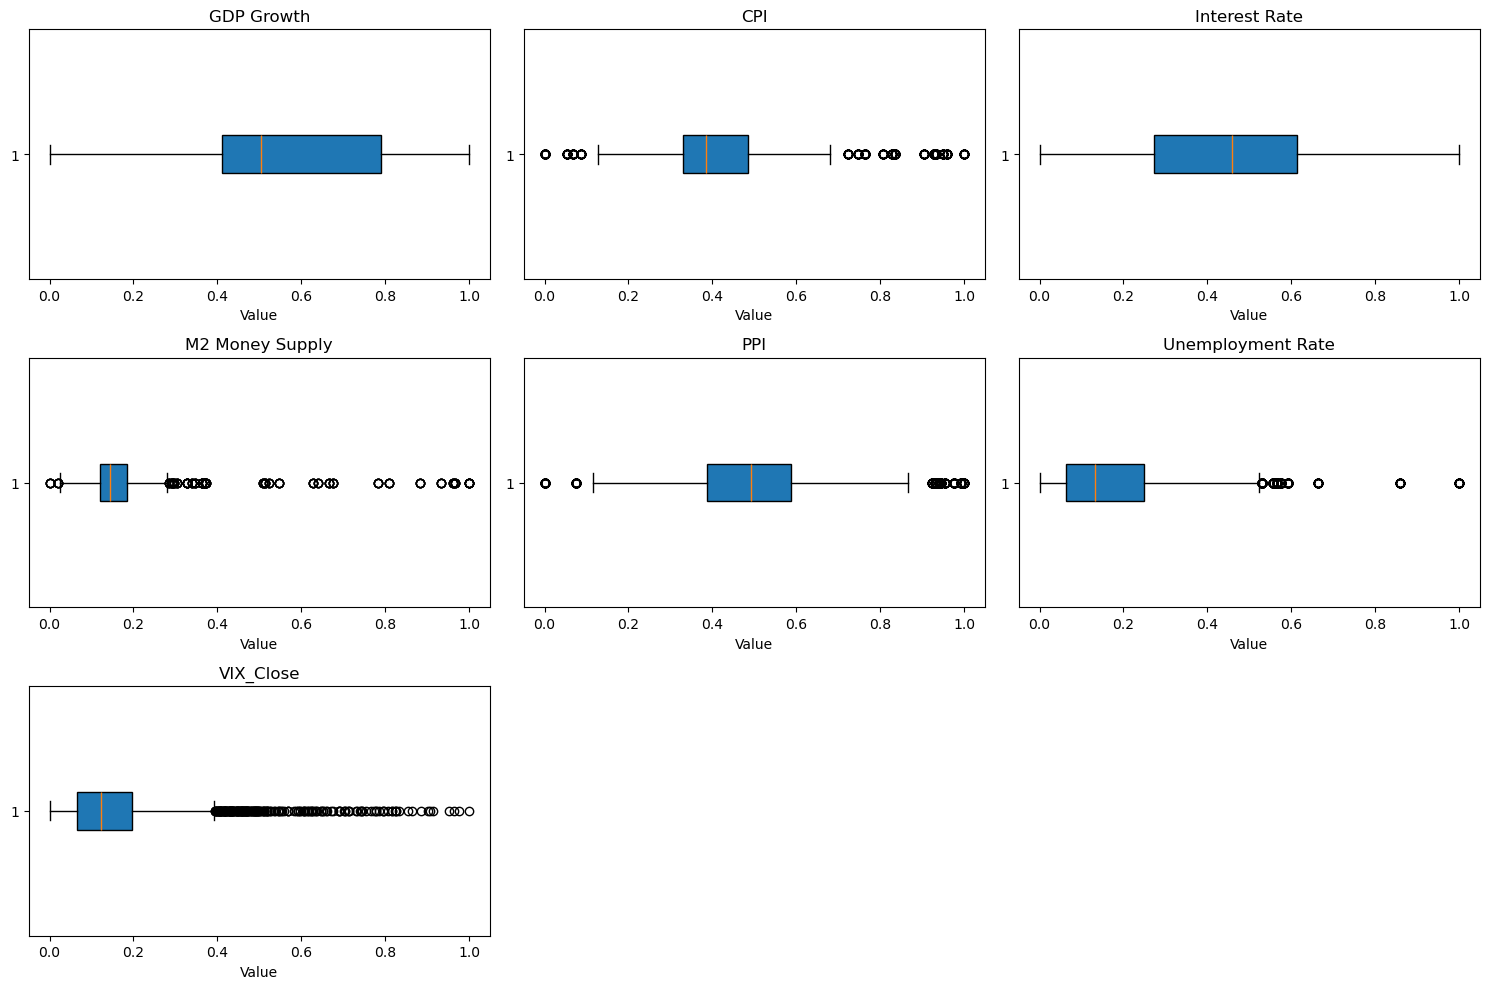

,GDP Growth,CPI,Interest Rate,M2 Money Supply,PPI,Unemployment Rate,VIX_Close
count,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000
mean,0.530139,0.407410,0.453255,0.149428,0.492139,0.185688,0.142400
std,0.248624,0.132377,0.216921,0.043627,0.164024,0.159606,0.094311
min,0.000000,0.098640,0.000000,0.024015,0.088138,0.000000,0.000000
25%,0.410874,0.329966,0.272727,0.120500,0.387175,0.061947,0.065738
50%,0.504875,0.384736,0.459330,0.144741,0.491480,0.132743,0.122366
75%,0.791042,0.484183,0.614035,0.184823,0.586533,0.247788,0.196533
max,1.000000,0.715509,1.000000,0.281308,0.885570,0.526549,0.392726


In [9]:
import pandas as pd

# Load the uploaded CSV file to inspect its contents
file_path = '../data/min_max_scaling/minmax_scaled_combined_data_nasdaq.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
data.head()

import matplotlib.pyplot as plt

# Calculate the Z-scores for numeric columns (excluding Market_Label)
numeric_columns = ['GDP Growth', 'CPI', 'Interest Rate', 'M2 Money Supply', 'PPI', 'Unemployment Rate', 'VIX_Close']

# Plot boxplots for each numeric column to visualize outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(data[column], vert=False, patch_artist=True)
    plt.title(column)
    plt.xlabel('Value')

png_save_path = '../data/min_max_scaling/box_plot.png'
plt.tight_layout()
plt.savefig(png_save_path, format="png", dpi=300, bbox_inches="tight")
plt.show()

# Define a function to detect and handle outliers using the IQR method
def handle_outliers_iqr(data, columns):
    cleaned_data = data.copy()
    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = cleaned_data[column].quantile(0.25)
        Q3 = cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the outliers within the bounds
        cleaned_data[column] = cleaned_data[column].clip(lower=lower_bound, upper=upper_bound)
    
    return cleaned_data

# Handle outliers in the numeric columns using the IQR method
data_cleaned = handle_outliers_iqr(data, numeric_columns)

# Verify changes in a few key metrics (e.g., min, max) for the cleaned dataset
data_cleaned[numeric_columns].describe()


